In [57]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nuflux.detgeo import SimulateDecays, SimulateDetector, SimNeutrinos,check_mem, plot, phi_distribution, event_timing, energies, plot_det, get_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
cc = SimulateDecays('', N_evals = 1e5)

Simulation: Mohkov et al. (Fermilab) parameter set with 1.000e+05 evaluations 
1.874e+05 MC generations; took 4.11 s


In [58]:
sims = SimNeutrinos(cc, Lss = 50).run(show_time = 0, collision = 'mu+mu-')

Simulation: Mohkov et al. (Fermilab) (μ+μ-) at L = 50.00 m with Det v2
Total Count: 4.92e+02 events; took 2.58 s
+----------------------+------------+-----------------+------------+-----------------+--------------+
|    Detector Parts    | ν_e events | anti ν_e events | ν_μ events | anti ν_μ events | Total Events |
+----------------------+------------+-----------------+------------+-----------------+--------------+
|   muon_detector_ec   | 3.888e+01  |    1.980e+01    | 4.642e+01  |    2.350e+01    |  1.286e+02   |
| muon_detector_barrel | 3.554e+01  |    1.808e+01    | 4.014e+01  |    2.033e+01    |  1.141e+02   |
|       solenoid       | 3.740e+00  |    1.906e+00    | 4.854e+00  |    2.455e+00    |  1.296e+01   |
|       hcal_ec        | 1.722e+01  |    8.782e+00    | 2.083e+01  |    1.055e+01    |  5.738e+01   |
|     hcal_barrel      | 1.746e+01  |    8.906e+00    | 2.071e+01  |    1.049e+01    |  5.757e+01   |
|       ecal_ec        | 7.565e-01  |    3.857e-01    | 9.584e-01  |   

In [49]:
sec = 'all'
_,y,z,_,times,_ = get_data(sims, sec = sec)

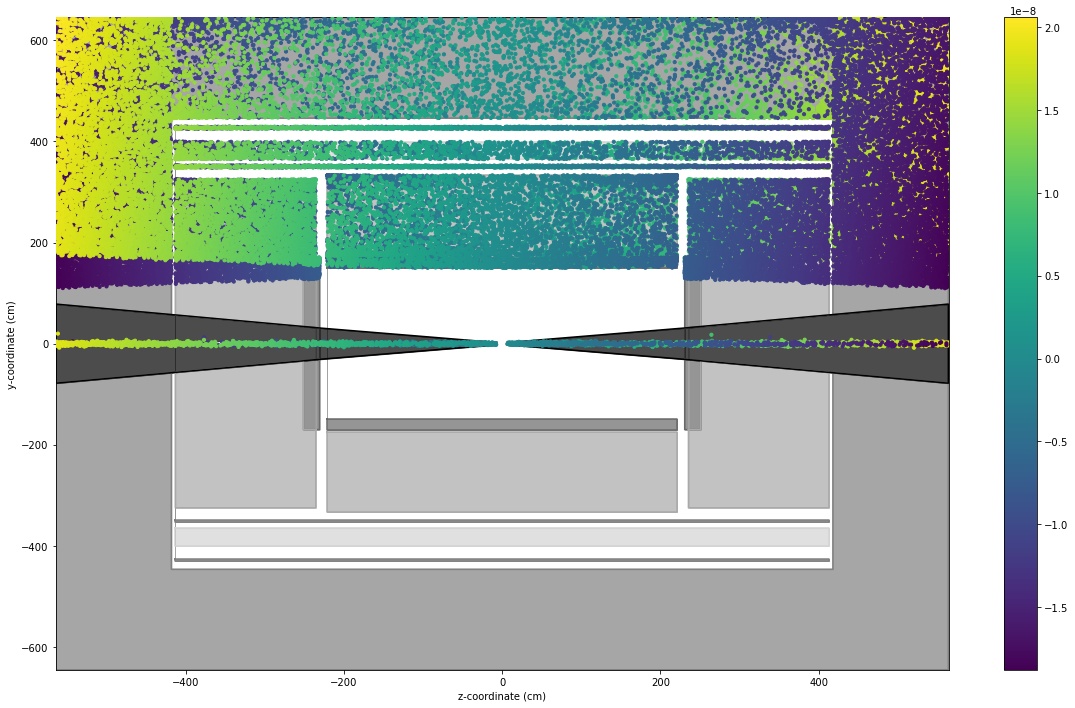

In [50]:
from matplotlib.colorbar import ColorbarBase
fig, ax = plt.subplots(figsize = (20,12))
mask = np.concatenate((sims[0].face_masks[sec], sims[1].face_masks[sec]))
cd = np.concatenate((sims[0].t_values, sims[1].t_values))[mask]
mt = np.concatenate((sims[0].mutimes, sims[1].mutimes))[mask]
plot_det('det_v2', ax)
h = ax.scatter(z, y,c = times, s = 10, zorder = 30)
fig.colorbar(h)
#plt.xlim(-564, 0)

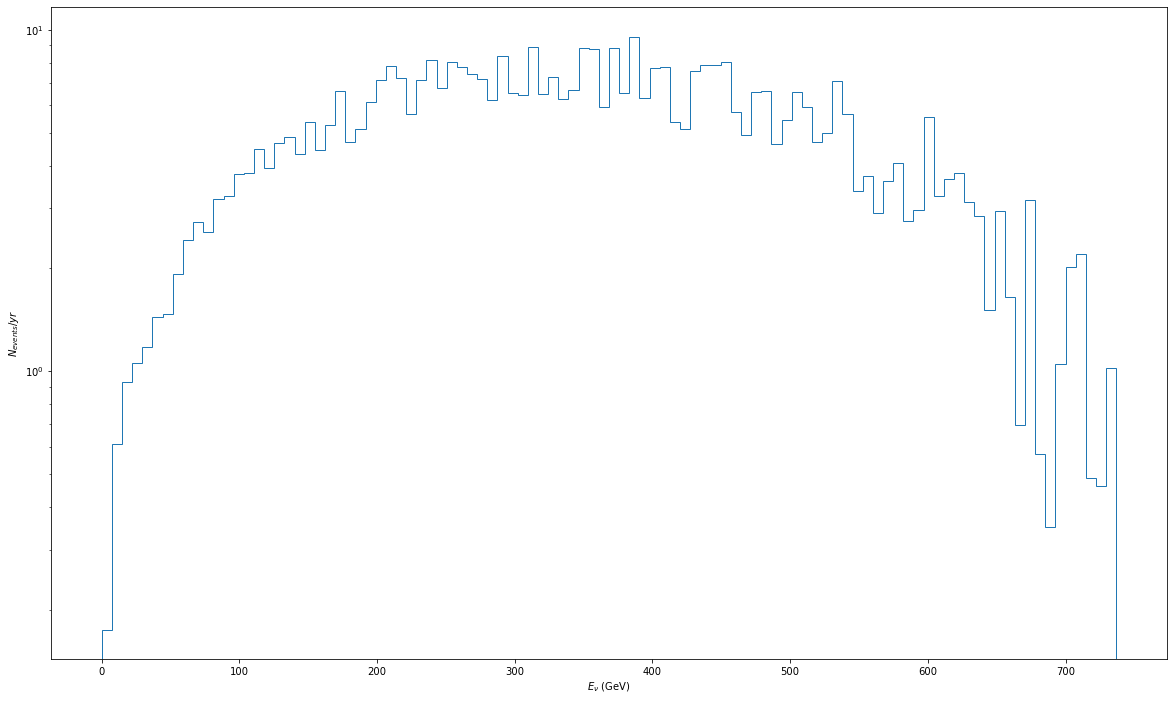

In [51]:
energies(sims)
plt.yscale('log')

(1, 100000000)

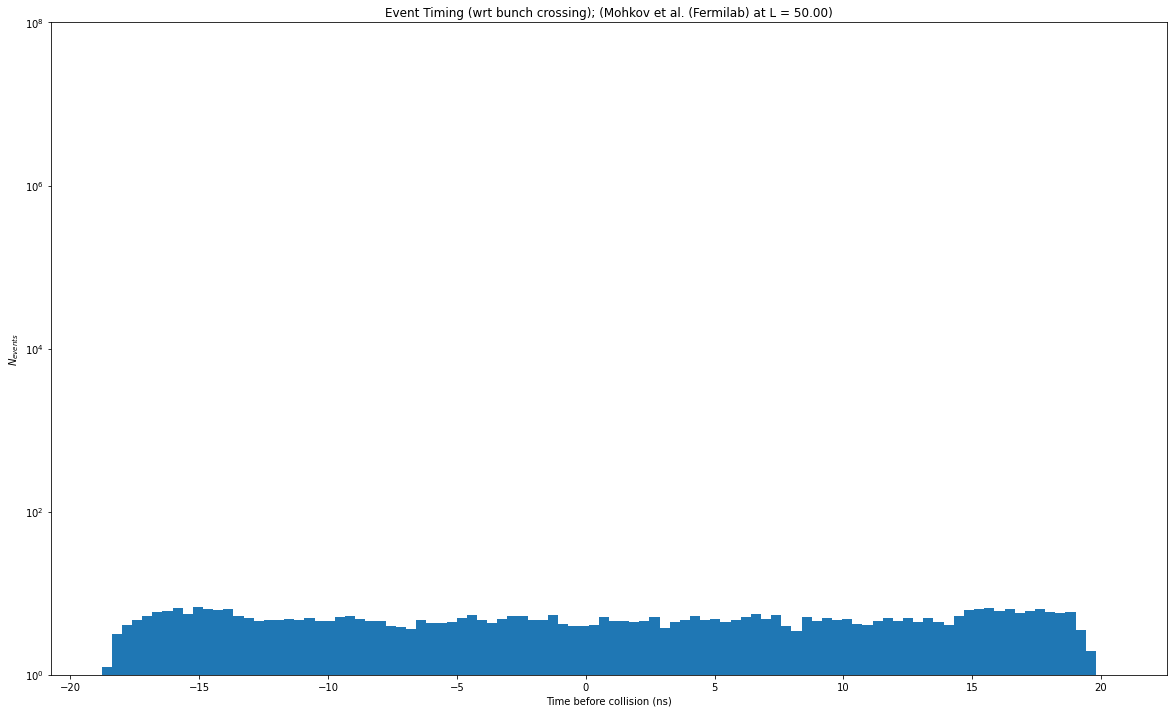

In [53]:
event_timing(sims)
plt.ylim(1, 10**8)

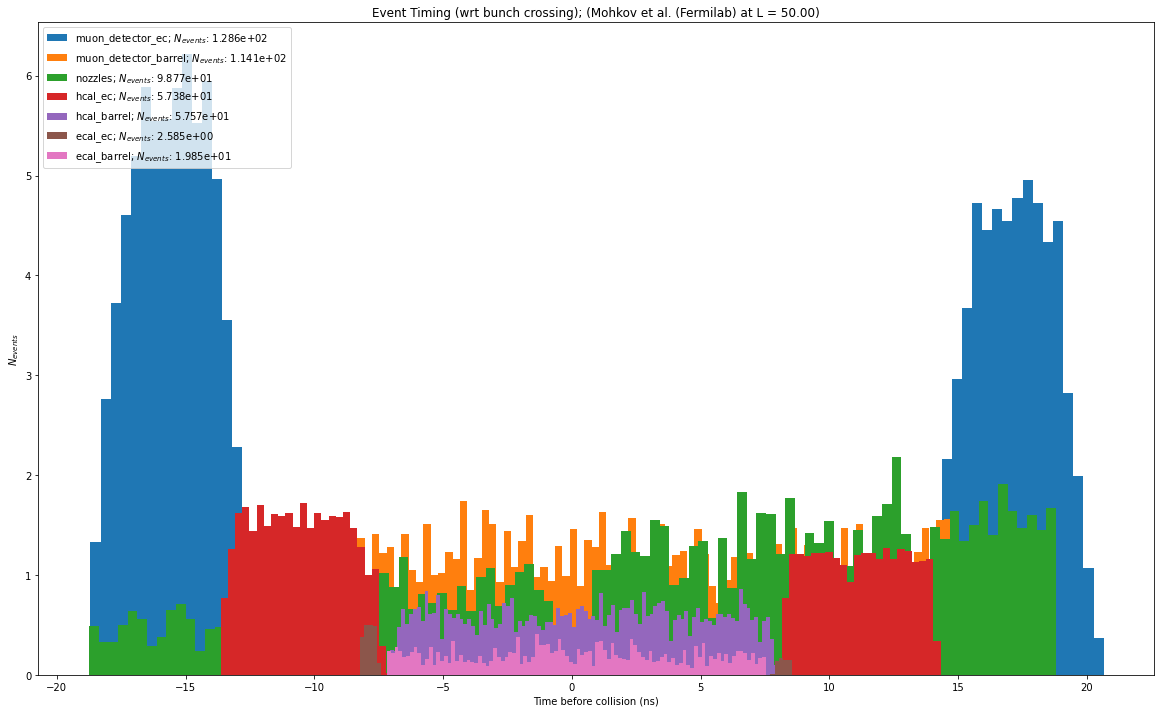

In [65]:
event_timing(sims, sec = 'muon_detector_ec')
event_timing(sims, sec = 'muon_detector_barrel', fs = None)
event_timing(sims, sec = 'nozzles', fs = None)
event_timing(sims, sec = 'hcal_ec', fs = None)
event_timing(sims, sec = 'hcal_barrel', fs = None)
event_timing(sims, sec = 'ecal_ec', fs = None)
event_timing(sims, sec = 'ecal_barrel', fs = None)
plt.legend(loc = 'upper left')
plt.yscale('linear')


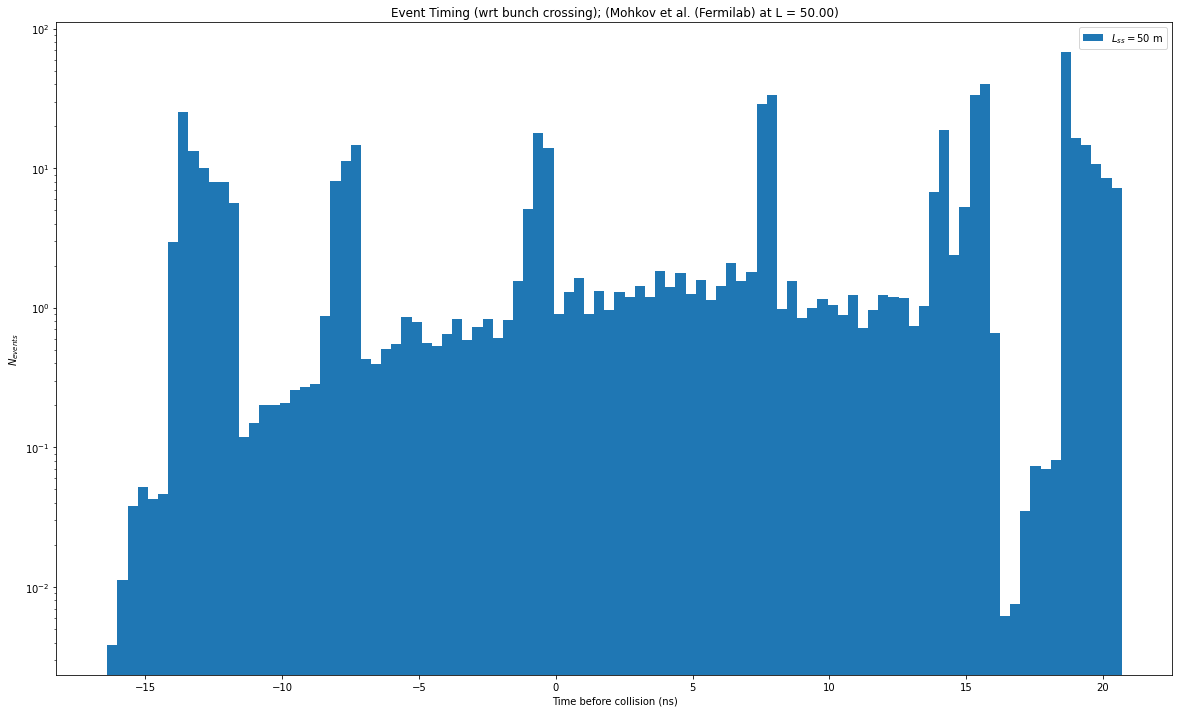

In [52]:
event_timing(sims, legend= 'True')

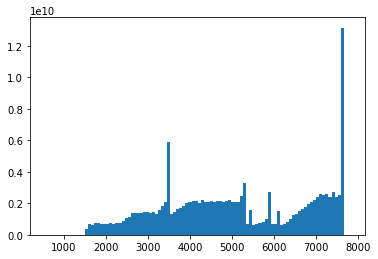

In [114]:
plt.hist(np.concatenate((sims[0].cdistances, sims[1].cdistances)), weights = np.concatenate((sims[0].w, sims[1].w)), bins = 100)
plt.show()

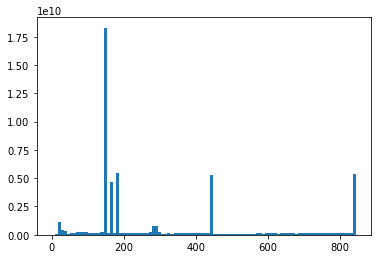

In [117]:
plt.hist(sims[0].distances, bins = 100, weights = sims[0].w)
plt.show()

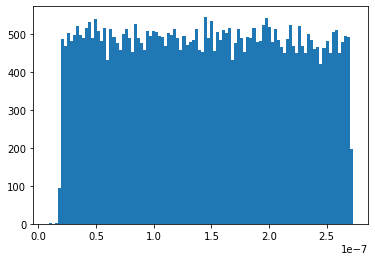

In [94]:
plt.hist(sims[0].mutimes, bins = 100)
plt.show()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([2.94509469e+10, 2.95038523e+10, 2.95567576e+10, 2.96096629e+10,
        2.96625682e+10, 2.97154735e+10, 2.97683788e+10, 2.98212841e+10,
        2.98741894e+10, 2.99270947e+10, 2.99800000e+10]),
 <BarContainer object of 10 artists>)

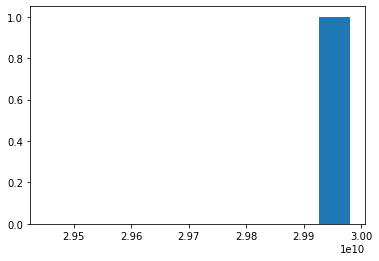

In [105]:
plt.hist(cc1.vmu, weights = cc1.weights)

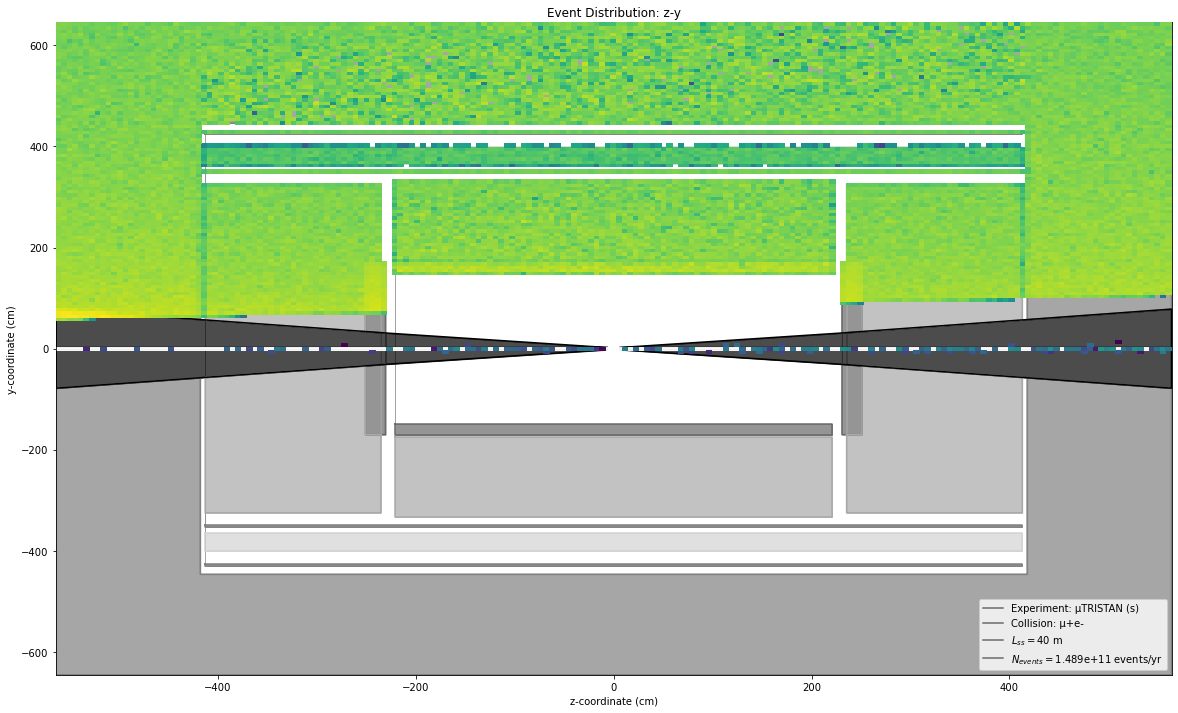

In [101]:
plot(sims)

In [80]:
fd = np.concatenate((sims[0].cdistances, sims[1].cdistances))
_,_,_,fw,_,_ = get_data(sims)
#sd = np.concatenate((sims2[0].cdistances, sims2[1].cdistances, sims2[0].cdistances, sims2[1].cdistances))
#_,_,_,sw,_,_ = get_data(sims2)

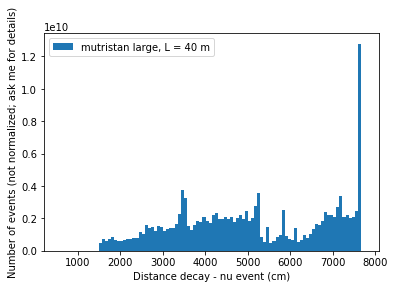

In [81]:
plt.hist(fd, bins = 100, weights = fw, label='mutristan large, L = 40 m')
#plt.hist(fd, bins = 100, weights = fw, label = 'mutristan small, L = 40 m')
#plt.xlim(0, 2000)
plt.xlabel('Distance decay - nu event (cm)')
plt.ylabel('Number of events (not normalized; ask me for details)')
plt.legend(loc = 'best')
plt.show()

In [82]:
fd

array([7521.9199396 , 7619.08895325, 7625.86834038, ..., 3214.35365037,
       3376.66753015, 3527.85990336])

In [73]:
np.concatenate((sims[0].cdistances, sims[1].cdistances))

array([7521.31548625, 7874.3375121 ,  820.03982484, ..., 3213.76168151,
       3376.07543894, 3527.26769819])

In [70]:
np.concatenate((sims[0].w, sims[1].w))

array([ 6267377.42272431, 14958939.36077001, 29793577.56470882, ...,
        1318118.86457058,  5631174.32513116,  6476155.5279899 ])

In [39]:
check_mem()

Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    22   1022.2 MiB   1022.2 MiB           1   @profile
    23                                         def check_mem():
    24                                             '''For memory-consuming-checking processes.'''
    25   1022.2 MiB      0.0 MiB           1       z = 1+2
    26   1022.2 MiB      0.0 MiB           1       return




In [2]:
cc1 = SimulateDecays('mutristan s', N_evals = 1e6)
cc2 = SimulateDecays('mutristan l', N_evals = 1e6)
cc3 = SimulateDecays('mucol s1', N_evals = 1e6)
cc4 = SimulateDecays('mucol s2', N_evals = 1e6)

Simulation: μTRISTAN (s) parameter set with 1.000e+06 evaluations 
1.853e+06 MC generations; took 34.5 s
Simulation: μTRISTAN (L) parameter set with 1.000e+06 evaluations 
1.853e+06 MC generations; took 34.2 s
Simulation: MuCoL (s1) parameter set with 1.000e+06 evaluations 
1.853e+06 MC generations; took 34.1 s
Simulation: MuCoL (s2) parameter set with 1.000e+06 evaluations 
1.853e+06 MC generations; took 33.9 s


In [17]:
ccs = [cc1, cc2, cc3, cc4]
Lss = [12, 20, 30, 40, 50, 60, 70]
#ccs = [cc1]
#Lss = [12]
ecs = {'cc1': [[],[]], 'cc2': [[],[]], 'cc3': [[],[]], 'cc4': [[],[]]}
collisions = ['mu+mu+', 'mu+mu+', 'mu+mu-', 'mu+mu-'] 
for i,key in enumerate(ccs):
    for L in Lss:
        sims = SimulateDetector(key, Lss = L).run(show_time = 0, collision = collisions[i])
        ecs[list(ecs.keys())[i]][0].append(sims[0].tc)
        ecs[list(ecs.keys())[i]][1].append(sims[0].ec['muon_detector_barrel'])

Simulation: μTRISTAN (s) (μ+μ+) at L = 12.00 m with Det v2
Total Count: 2.41e+11 events; took 11.8 s
Simulation: μTRISTAN (s) (μ+μ+) at L = 20.00 m with Det v2
Total Count: 2.04e+11 events; took 11.7 s
Simulation: μTRISTAN (s) (μ+μ+) at L = 30.00 m with Det v2
Total Count: 1.68e+11 events; took 11.6 s
Simulation: μTRISTAN (s) (μ+μ+) at L = 40.00 m with Det v2
Total Count: 1.47e+11 events; took 11.3 s
Simulation: μTRISTAN (s) (μ+μ+) at L = 50.00 m with Det v2
Total Count: 1.36e+11 events; took 10.9 s
Simulation: μTRISTAN (s) (μ+μ+) at L = 60.00 m with Det v2
Total Count: 1.16e+11 events; took 10.7 s
Simulation: μTRISTAN (s) (μ+μ+) at L = 70.00 m with Det v2
Total Count: 9.43e+10 events; took 10.6 s
Simulation: μTRISTAN (L) (μ+μ+) at L = 12.00 m with Det v2
Total Count: 4.65e+11 events; took 10.9 s
Simulation: μTRISTAN (L) (μ+μ+) at L = 20.00 m with Det v2
Total Count: 4.35e+11 events; took 10.8 s
Simulation: μTRISTAN (L) (μ+μ+) at L = 30.00 m with Det v2
Total Count: 3.88e+11 events; to

In [19]:
with open('gen_data/ecs.pkl', 'wb') as f:
    pickle.dump(ecs, f)

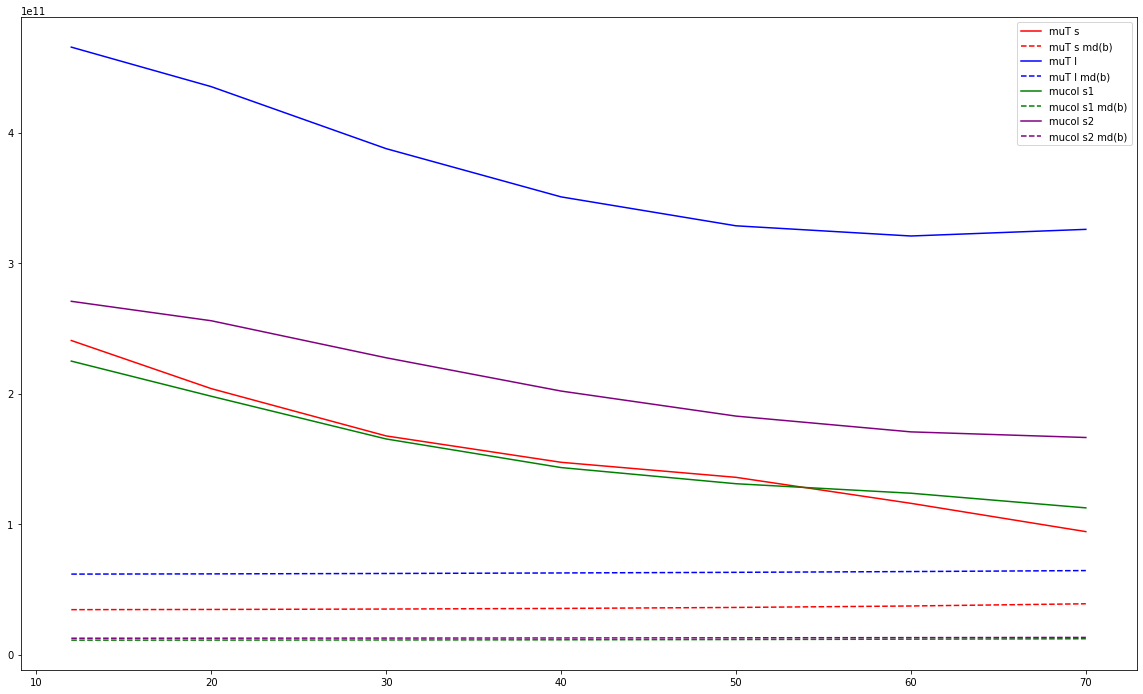

In [35]:
colors = ['red', 'blue', 'green', 'purple']
labs = ['muT s', 'muT l', 'mucol s1', 'mucol s2']
plt.figure(figsize = (20,12))
for i in range(4):
    plt.plot(Lss, ecs[list(ecs.keys())[i]][0], c = colors[i], label = labs[i])
    plt.plot(Lss, ecs[list(ecs.keys())[i]][1], c = colors[i], linestyle = '--', label = labs[i] + ' md(b)')

#plt.yscale('log')
plt.legend(loc = 'upper right')

In [23]:
check_mem()

Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    22   1182.4 MiB   1182.4 MiB           1   @profile
    23                                         def check_mem():
    24                                             '''For memory-consuming-checking processes.'''
    25   1182.4 MiB      0.0 MiB           1       z = 1+2
    26   1182.4 MiB      0.0 MiB           1       return




In [13]:
Lss = [50]
collision = 'mu+mu-'
for L in Lss:
    sims = SimulateDetector(cc, Lss = L).run(show_time = 0, collision = collision)
    sims = SimulateDetector(cc1, Lss = L).run(show_time = 0, collision = collision)

Simulation: MuCoL (s2) (μ+μ-) at L = 50.00 m with Det v2 as a detector
Total Count: 1.79e+11 events; took 22.7 s
+----------------+------------+-----------------+------------+-----------------+--------------+
| Detector Parts | ν_e events | anti ν_e events | ν_μ events | anti ν_μ events | Total Events |
+----------------+------------+-----------------+------------+-----------------+--------------+
| muon_detector  | 2.659e+10  |    1.377e+10    | 3.081e+10  |    1.601e+10    |  8.719e+10   |
|    solenoid    | 1.266e+09  |    6.550e+08    | 1.504e+09  |    7.816e+08    |  4.207e+09   |
|      hcal      | 1.503e+10  |    7.782e+09    | 1.753e+10  |    9.111e+09    |  4.946e+10   |
|      ecal      | 3.056e+09  |    1.582e+09    | 3.560e+09  |    1.851e+09    |  1.005e+10   |
|    nozzles     | 8.606e+09  |    4.456e+09    | 9.847e+09  |    5.117e+09    |  2.803e+10   |
|     TOTAL      | 5.455e+10  |    2.824e+10    | 6.325e+10  |    3.287e+10    |  1.789e+11   |
+----------------+-----

In [8]:
cc1 = SimulateDecays('mutristan l', N_evals = 1e6)

Simulation: μTRISTAN (L) parameter set with 1.000e+06 evaluations 
1.853e+06 MC generations; took 32.8 s


In [10]:
Lss = [12, 70, 300]
collision = 'mu+mu+'
for L in Lss:
    sims = SimulateDetector(cc1, Lss = L).run(show_time = 0, collision = collision)

Simulation: μTRISTAN (L) (μ+μ+) at L = 12.00 m with Det v2 as a detector
Total Count: 4.60e+11 events; took 13.1 s
+----------------+------------+------------+--------------+
| Detector Parts | ν_e events | ν_μ events | Total Events |
+----------------+------------+------------+--------------+
| muon_detector  | 9.114e+10  | 5.472e+10  |  1.459e+11   |
|    solenoid    | 4.537e+09  | 2.700e+09  |  7.237e+09   |
|      hcal      | 5.046e+10  | 3.058e+10  |  8.104e+10   |
|      ecal      | 1.015e+10  | 6.185e+09  |  1.633e+10   |
|    nozzles     | 1.306e+11  | 7.858e+10  |  2.092e+11   |
|     TOTAL      | 2.869e+11  | 1.728e+11  |  4.596e+11   |
+----------------+------------+------------+--------------+
Simulation: μTRISTAN (L) (μ+μ+) at L = 70.00 m with Det v2 as a detector
Total Count: 3.23e+11 events; took 11.4 s
+----------------+------------+------------+--------------+
| Detector Parts | ν_e events | ν_μ events | Total Events |
+----------------+------------+------------+------

In [22]:
Lss = 400
collision = 'mu+mu-'
sims4 = SimulateDetector(cc, geom, particle = None, Lss = Lss).run(show_components = 0, show_time = 0, collision = collision)

Simulation: MuCoL (s2) (μ+μ-) at L = 400.00 m with Det v2 as a detector
Total Count: 5.33e+11 events; took 1.33 s


In [10]:
#plot(sims, fs = (10,6), orientation = 'z-y')

In [39]:
#phi_distribution(sims, nbins = 50)

<ipython-input-42-0aa7d1ed5163>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 1])


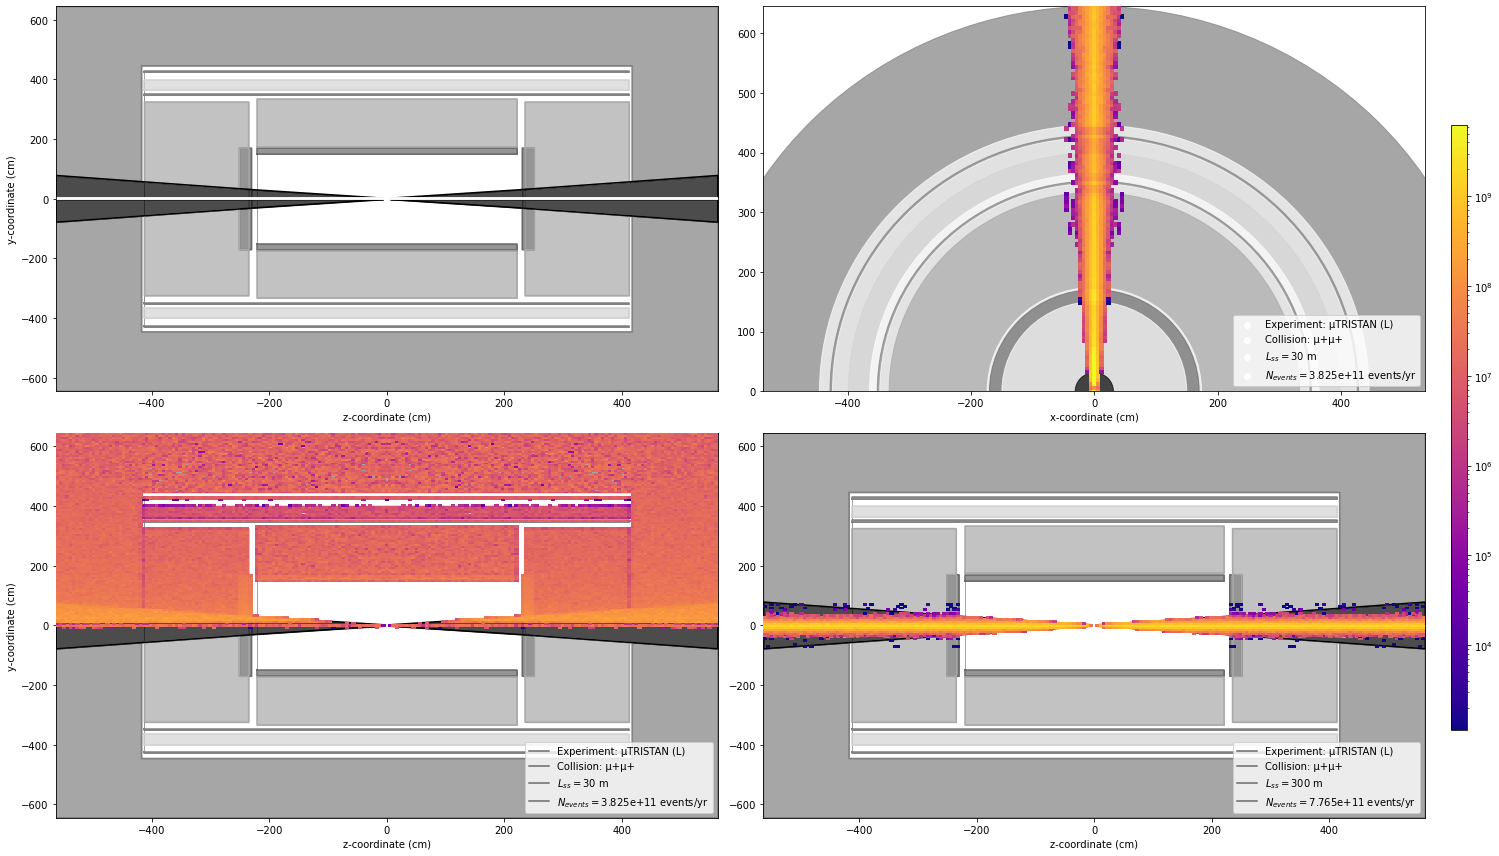

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (21.05,12))
x, y, z, w, _, _ = get_data(sims)
_, y2, z2, w2, _, _ = get_data(sims2)

h1 = np.histogram2d(x, y, weights = w, bins = 200)
h2 = np.histogram2d(z, y, weights = w, bins = 200)
h3 = np.histogram2d(z2, y2, weights = w2, bins = 200)

vmin = min(np.min(h1[0][h1[0] > 1e3]), np.min(h2[0][h2[0] > 1e3]), np.min(h3[0][h3[0] > 1e3]))
vmax = max(h1[0].max(), h2[0].max(), h3[0].max())

plot_det('det_v2', axs[0,0], xl  = True, orientation = 'z-y')
h = plot(sims, orientation = 'x-y', ax = axs[0,1], title = False, xl = True, yl = False, vmin = vmin, vmax = vmax, h = True, cmap = 'plasma')
plot(sims, ax = axs[1,0], title = False, vmin = vmin, vmax = vmax, cmap = 'plasma')
plot(sims2, ax = axs[1,1], title = False, yl = False, vmin = vmin, vmax = vmax, cmap = 'plasma')

cbar_ax = fig.add_axes([0.96, 0.15, 0.01, 0.7])  # Position: [left, bottom, width, height]
fig.colorbar(h[3], cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.95, 1]) 
plt.savefig("plots_Luc/paper/events6.jpg", bbox_inches = 'tight', dpi = 300)

In [62]:
cc = SimulateDecays('mokhov', N_evals = 1e5)
Lss = 50
collision = 'mu+mu-'
sims5 = SimulateDetector(cc, geom = geom, particle = None, Lss = Lss).run(show_components = 0, show_time = 0, collision = collision)

Simulation: Mohkov et al. (Fermilab) parameter set with 1.000e+05 evaluations 
1.875e+05 MC generations; took 3.73 s
Simulation: Mohkov et al. (Fermilab) (μ+μ-) at L = 50.00 m with Det v2 as a detector
Total Count: 8.86e+10 events; took 1.46 s


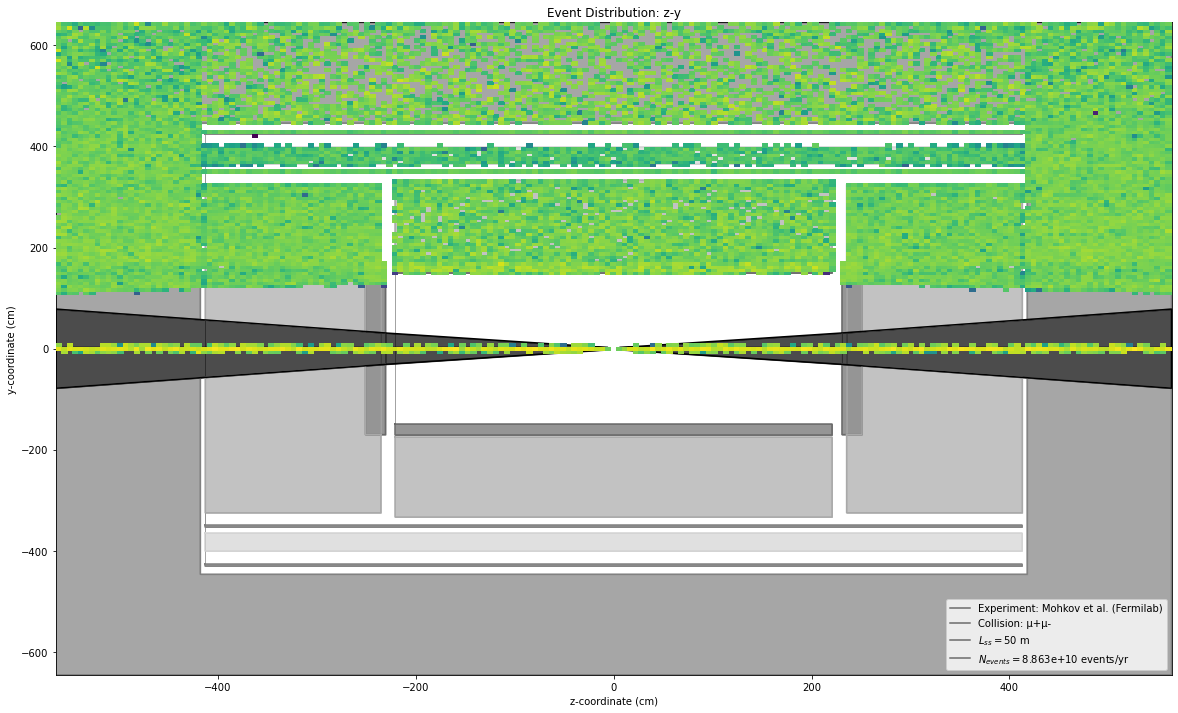

In [63]:
plot(sims5, h = False)

In [99]:
Lss = 200
collision = 'mu+mu-'
sims6 = SimulateDetector(cc, geom, particle = None, Lss = Lss).run(show_components = 0, show_time = 0, collision = collision)

Simulation: MuCoL (s2) (μ+μ-) at L = 200.00 m with Det v2 as a detector
Total Count: 1.96e+11 events; took 1.19 s


In [100]:
Lss = 400
collision = 'mu+mu-'
sims7 = SimulateDetector(cc, geom, particle = None, Lss = Lss).run(show_components = 0, show_time = 0, collision = collision)

Simulation: MuCoL (s2) (μ+μ-) at L = 400.00 m with Det v2 as a detector
Total Count: 5.33e+11 events; took 1.34 s


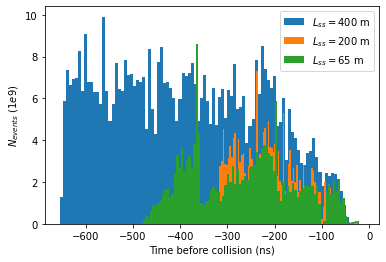

In [116]:
event_timing(sims7, fs=None, title = False)
event_timing(sims6, fs = None, title = 0)
event_timing(sims5, fs = None, legend =True, title = 0,savefig ='plots_Luc/paper/times.jpg')

In [12]:
#case study: mohkov parameters, neutrino events per bunch crossing.
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from nuflux.detgeo import SimulateDecays, SimulateDetector, check_mem, plot, phi_distribution, event_timing
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
cc = SimulateDecays('mohkov', N_evals = 1e5)
Lss = 50
geom = "det_v2"
collision = 'mu+mu-'
sims = SimulateDetector(cc, geom, particle = None, Lss = Lss).run(show_components = 1, show_time = 0, collision = collision)

Simulation: Mohkov Fermilab parameter set with 1.000e+05 evaluations 
1.875e+05 MC generations; took 3.52 s
Simulation: Mohkov Fermilab (μ+μ-) at L = 50.00 m with Det v2 as a detector
Total Count: 7.31e+03 events; took 2.52 s
+----------------+------------+-----------------+------------+-----------------+--------------+
| Detector Parts | ν_e events | anti ν_e events | ν_μ events | anti ν_μ events | Total Events |
+----------------+------------+-----------------+------------+-----------------+--------------+
| muon_detector  | 1.148e+03  |    5.839e+02    | 1.274e+03  |    6.454e+02    |  3.651e+03   |
|    solenoid    | 6.475e+01  |    3.292e+01    | 7.234e+01  |    3.662e+01    |  2.066e+02   |
|      hcal      | 5.587e+02  |    2.841e+02    | 6.346e+02  |    3.215e+02    |  1.799e+03   |
|      ecal      | 1.015e+02  |    5.165e+01    | 1.134e+02  |    5.752e+01    |  3.242e+02   |
|    nozzles     | 4.286e+02  |    2.181e+02    | 4.559e+02  |    2.312e+02    |  1.334e+03   |
|     

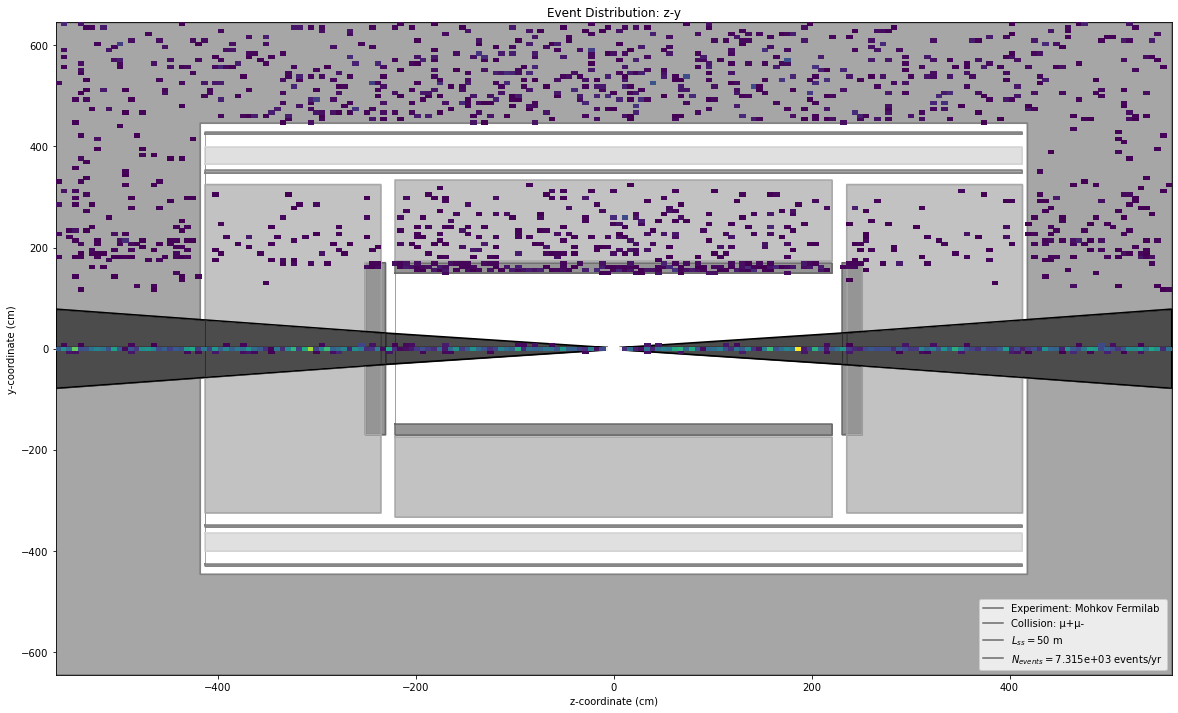

In [39]:
plot(sims)

In [4]:
#so about 7500 events; frep is 15 Hz, so..
print(f"Neutrino Events per bunch crossing (Mohkov): {sims[0].tc/15:.3e}")

Neutrino Events per bunch crossing (Mohkov): 4.966e+02


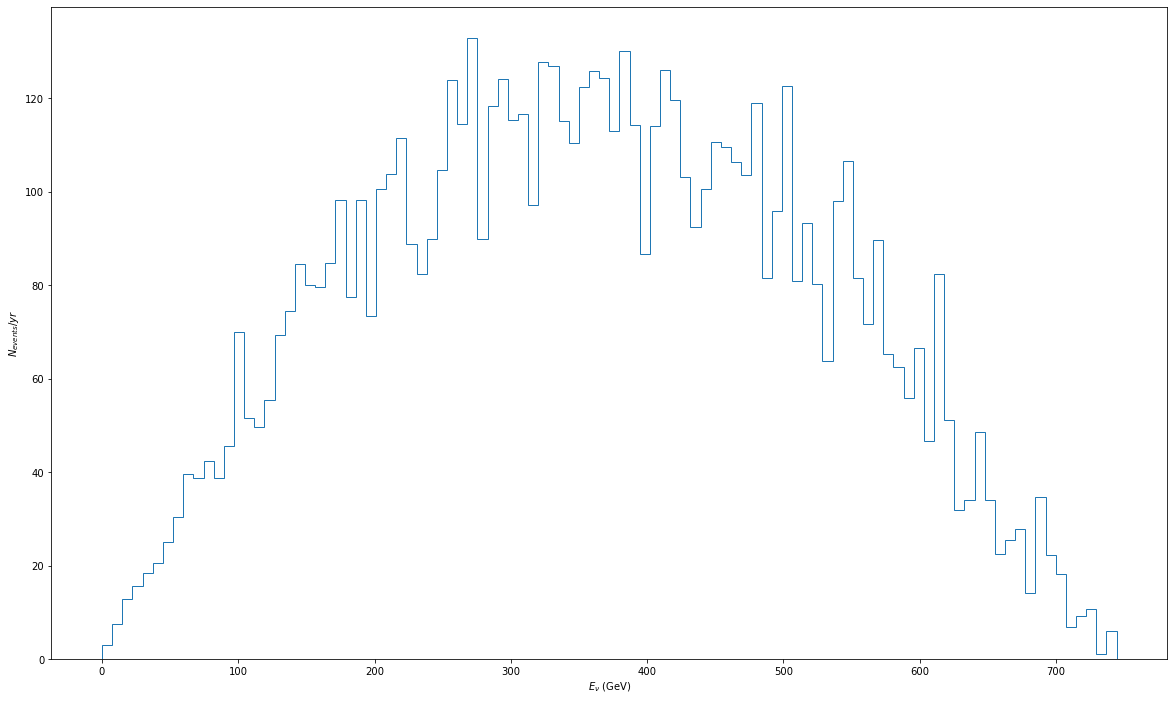

In [25]:
E,w = energies(sims, give_data = True)

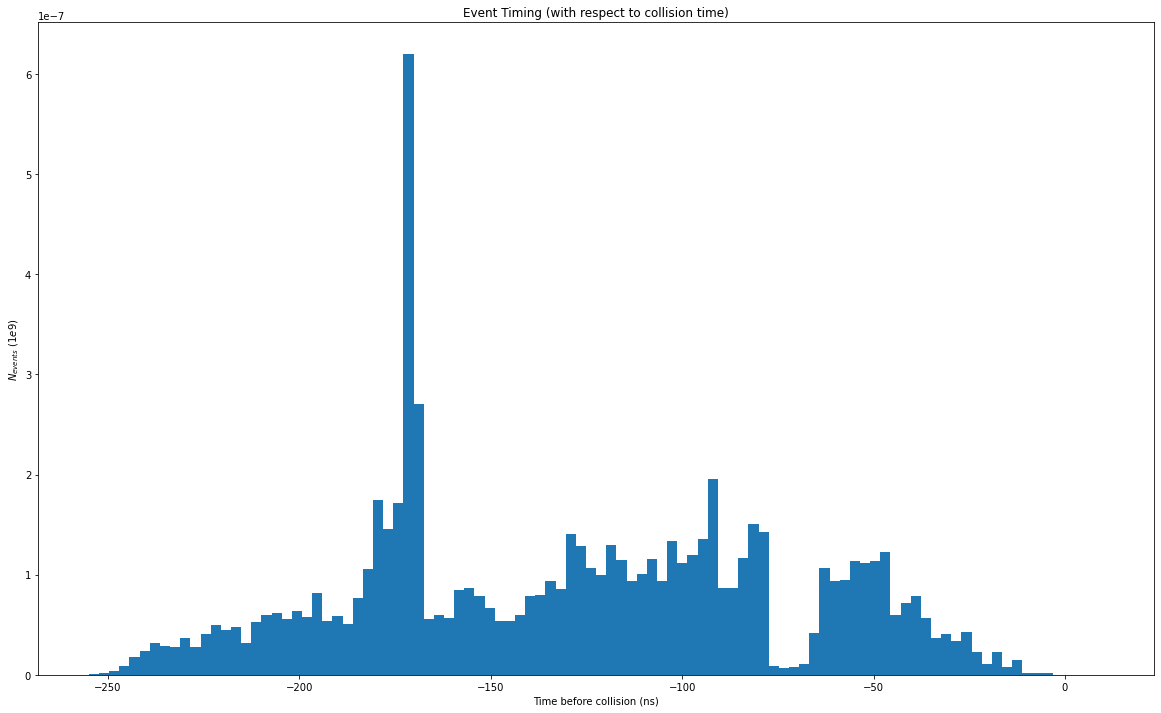

In [40]:
event_timing(sims)

In [31]:
np.sum(E*w)/np.sum(w) * 1e-3 *sims[0].tc /15

178.95823744328416

In [33]:
1e10 / (365.25 * 24* 3600 * 0.7) / 4e6

0.00011317174219296054

In [36]:
1e10/(1.2e7)/5

166.66666666666669

In [14]:
check_mem()

Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    22    882.7 MiB    882.7 MiB           1   @profile
    23                                         def check_mem():
    24                                             '''For memory-consuming-checking processes.'''
    25    882.7 MiB      0.0 MiB           1       z = 1+2
    26    882.7 MiB      0.0 MiB           1       return


